In [4]:
import sys
mins = 60

from hmmlearn import hmm

import nilmtk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import warnings
import sys
sys.path.append("../code/")

In [22]:
st['/26']['%s' %year][feed_r[appliance]].iloc[3600:4080]

localhour
2015-03-25 10:00:00-05:00       0.00000
2015-03-25 11:00:00-05:00       0.00000
2015-03-25 12:00:00-05:00       0.00000
2015-03-25 13:00:00-05:00       0.00000
2015-03-25 14:00:00-05:00       0.00000
2015-03-25 15:00:00-05:00       0.00000
2015-03-25 16:00:00-05:00       0.00000
2015-03-25 17:00:00-05:00       0.00000
2015-03-25 18:00:00-05:00       0.00000
2015-03-25 19:00:00-05:00       0.00000
2015-03-25 20:00:00-05:00       0.00000
2015-03-25 21:00:00-05:00       0.00000
2015-03-25 22:00:00-05:00       0.00000
2015-03-25 23:00:00-05:00       0.00000
2015-03-26 00:00:00-05:00       0.00000
2015-03-26 01:00:00-05:00       0.00000
2015-03-26 02:00:00-05:00       0.00000
2015-03-26 03:00:00-05:00    1408.18335
2015-03-26 04:00:00-05:00       0.00000
2015-03-26 05:00:00-05:00       0.00000
2015-03-26 06:00:00-05:00       0.00000
2015-03-26 07:00:00-05:00       0.00000
2015-03-26 08:00:00-05:00       0.00000
2015-03-26 09:00:00-05:00       0.00000
2015-03-26 10:00:00-05:00     

In [ ]:
warnings.filterwarnings("ignore")



from nilmtk import *
import os
import nilmtk

metadata_df = pd.read_csv("./metadata.csv",index_col=0)
feeds = {'use':'aggregate',
        'air1':'hvac',
         'clotheswasher1':'wm',
         'dishwasher1':'dw',
         'microwave1':'mw',
         'refrigerator1':'fridge',
         'oven1':'oven',
        }

feed_r = {v:k for k, v in feeds.iteritems()}
city = 'Austin'
year = 2015


st = pd.HDFStore(os.path.expanduser("~/all.h5"), mode='r')

city_data = metadata_df[metadata_df['city'] == city]
city_homes = city_data.index.values.astype('int')

from common import APPLIANCES_ORDER

models = {}

In [35]:
for appliance in APPLIANCES_ORDER[1:2]:
    print appliance, "training"
    o = []
    for hn, home in enumerate(city_homes[:]):
        print home, hn

        
        try:
            dft = st['/%d' %home]['%s' %year][feed_r[appliance]].iloc[3600:4080]
            appl_power = dft.dropna().values.reshape(-1,1)
            activation = (dft>10).sum()*1.0/len(dft)
            if appliance in ["wm","dw","oven","mw"]:
                if len(appl_power)>10:
                    o.append(appl_power)

            else:
                if activation>0.08:
                    o.append(appl_power)
        except :
            pass

    if len(o)>1:
        o = np.array(o)
        print("Length of o", o.shape)
        mod = hmm.GaussianHMM(3, "full")
        mod.fit(o)
        models[appliance] = mod
        print "Means for %s are" %appliance
        print mod.means_
    else:
        print "Not enough samples for %s" %appliance

hvac training
2836 0
2743 1
5323 2
8560 3
3313 4
5052 5
3936 6
1622 7
1114 8
5433 9
1101 10
8872 11
1464 12
3824 13
78 14
8047 15
5839 16
1050 17
8597 18
7982 19
7057 20
3192 21
18 22
35 23
114 24
370 25
545 26
585 27
661 28
744 29
964 30
1185 31
1192 32
1463 33
1642 34
1718 35
1790 36
1800 37
1801 38
1852 39
2018 40
2129 41
2233 42
2335 43
2337 44
2345 45
2461 46
2575 47
2638 48
2645 49
2653 50
2814 51
2818 52
2859 53
2945 54
3009 55
3039 56
3456 57
3482 58
3544 59
3577 60
3739 61
3918 62
3967 63
4031 64
4228 65
4336 66
4421 67
4447 68
4590 69
4671 70
4726 71
4767 72
4998 73
5193 74
5275 75
5403 76
5545 77
5785 78
5972 79
6423 80
6830 81
6836 82
6990 83
7024 84
7036 85
7113 86
7504 87
7536 88
7680 89
7731 90
7940 91
8084 92
8236 93
8317 94
8767 95
8829 96
8890 97
9121 98
9134 99
9160 100
9237 101
9729 102
5524 103
583 104
4922 105
1994 106
8188 107
624 108
990 109
1600 110
1953 111
2004 112
2156 113
2199 114
2365 115
2378 116
2749 117
2787 118
2953 119
3531 120
4220 121
4298 122
4395 

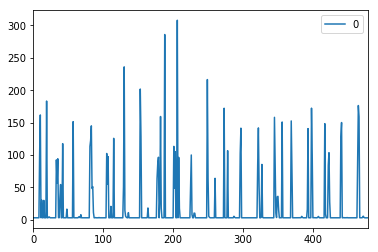

In [33]:
pd.DataFrame(o[3]).plot()

In [36]:
# In[8]:

from nilmtk.disaggregate.fhmm_exact import sort_learnt_parameters


# In[9]:

new_learnt_models = OrderedDict()
for appliance, appliance_model in models.iteritems():
    startprob, means, covars, transmat = sort_learnt_parameters(
                    appliance_model.startprob_, appliance_model.means_,
                    appliance_model.covars_, appliance_model.transmat_)
    new_learnt_models[appliance] = hmm.GaussianHMM(
                startprob.size, "full", startprob, transmat)
    new_learnt_models[appliance].means_ = means
    new_learnt_models[appliance].covars_ = covars


# In[ ]:

from nilmtk.disaggregate.fhmm_exact import create_combined_hmm


# In[ ]:

learnt_model_combined = create_combined_hmm(new_learnt_models)


# In[ ]:

from nilmtk.disaggregate.fhmm_exact import FHMM


# In[16]:

f = FHMM()


# In[17]:

f.model = learnt_model_combined
f.individual = new_learnt_models


# In[18]:

import pickle


# In[19]:

pickle.dump(f, open( "../fhmm_model_all_%d.p" %mins, "wb" ))

In [46]:
tensor = pickle.load(open('hourly.pkl','r'))

In [ ]:
from common import APPLIANCES_ORDER

In [75]:
pred_fhmm = {}
index = pd.DatetimeIndex(start="2015", freq='1H', periods=365*24)

In [185]:
out = []
for home in range(318):
    print home
    agg = pd.Series(tensor[home, 0, :, :].reshape((365*24, )), index=index)
    if len(agg.dropna()):
        p = f.disaggregate_chunk(agg)
        p = p.reindex(index)

        p["aggregate"] = agg
        p = p[APPLIANCES_ORDER]
        temp = np.zeros((7, 365, 24))
        for i in range(7):
            temp[i] = p[APPLIANCES_ORDER[i]].values.reshape(365, 24)
            
        out.append(temp)
    else:
        t = np.zeros((7, 365, 24))
        t[:] = np.nan
        out.append(t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [186]:
q = np.array(out)

In [189]:
hourly_4d(tensor[:, :, :, :], q).median()

aggregate          NaN
dw           19.817354
fridge        0.859017
hvac          0.769903
mw            8.495219
oven         10.124533
wm           15.293968
dtype: float64

In [179]:
tensor[0, 0, 0, :]

array([ 2547.41674805,  5102.43310547,  3928.19995117,  1106.05004883,
         961.54998779,   914.91668701,  1060.9666748 ,   938.43334961,
        1404.31665039,   916.93334961,  2025.0333252 ,  2630.5       ,
        3567.06665039,  4115.79980469,  2882.55004883,  2212.21655273,
        1864.44995117,  1789.01672363,  1839.69995117,  1751.        ,
        1569.73327637,  3723.03344727,  2899.71655273,  2418.38330078])

In [180]:
q[0, 0, 0, :]

array([ 2547.41674805,  1634.        ,   105.        ,    34.        ,
         468.        ,     0.        ,   311.        ,  5102.43310547,
        1634.        ,   206.        ,   121.        ,   468.        ,
         100.        ,   311.        ,  3928.19995117,  1634.        ,
         206.        ,   121.        ,   468.        ,   100.        ,
         311.        ,  1106.05004883,   511.        ,   105.        ])

In [190]:
out=np.array(out)

In [191]:
pickle.dump(out, open('fhmm-pred.pkl','w'))

In [130]:
from common import hourly_4d

In [132]:
hourly_4d(tensor, out).median()

aggregate      1.203094
dw            47.946279
fridge         4.143315
hvac           0.755107
mw            73.031442
oven          14.493115
wm           110.222092
dtype: float64

In [146]:
out[0].reshape(7, 365*24)

array([[ 2547.41674805,  1634.        ,   105.        , ...,
         1066.15002441,   511.        ,   105.        ],
       [  121.        ,    18.        ,     0.        , ...,
           34.        ,     0.        ,   100.        ],
       [  311.        ,   792.18334961,   511.        , ...,
            9.        ,   758.90002441,   511.        ],
       ..., 
       [  100.        ,     9.        ,  1103.86669922, ...,
            9.        ,   311.        ,  1542.9666748 ],
       [  511.        ,   206.        ,    34.        , ...,
           12.        ,   105.        ,     3.        ],
       [   18.        ,     9.        ,   311.        , ...,
           18.        ,     0.        ,     9.        ]])

In [143]:
tensor[0].shape

(7, 365, 24)

# p

In [ ]:
# In[8]:

all_homes_all_appliance = []
for appliance in ["fridge","hvac","dr","dw","wm","light"]:
    all_homes_all_appliance = np.union1d(all_homes_all_appliance, all_homes[appliance])


# In[21]:

import sys


# In[22]:

st_out = pd.HDFStore("../fhmm_out_%d.h5" %mins)
done = -1
for home in all_homes_all_appliance[:]:
    done = done +1
    print "%0.2f" %(100*done/len(all_homes_all_appliance))
    sys.stdout.flush()
    try:
        mains_df = st['/%d' %home][['use']]['2013'].resample("%dT" %mins)
        pred = f.disaggregate_chunk(mains_df).resample("1M", how="sum").mul(0.000017).mul(mins)
        pred.index = range(1, 13)
        pred = pred.rename(columns={'air conditioner':'hvac','dish washer':'dw',
                                    'spin dryer':'dr','washing machine':'wm'})
        st_out['%d' %home] = pred
    except:
        pass



# In[9]:

st_out = pd.HDFStore("../fhmm_out_%d.h5" %mins)
fhmm_accur = {}
for appliance in ["hvac","fridge","dw","wm","light","dr"]:
    print appliance

    if appliance =="hvac":
        start, end = 5, 11
    else:
        start, end = 1, 13
    out_ap = {}
    accuracies = {}
    for home in all_homes[appliance][:]:
        out_ap[home] = {}
        pred = st_out['/%d' %home][appliance]
        for month in range(start, end):
            out_ap[home][month] = {}
            gt = df.ix[home]['%s_%d' %(appliance, month)]
            out_ap[home][month]['gt'] = gt
            out_ap[home][month]['pred'] = pred.ix[month]
        a = pd.DataFrame(out_ap[home]).T
        e = (a['gt']-a['pred']).abs().div(a['gt'])*100
        accur = 100-e
        accur[accur<0] = 0
        accuracies[home] = accur
    fhmm_accur[appliance] = pd.DataFrame(accuracies)